In [1]:
# https://www.kaggle.com/tamber/steam-video-games
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

from pandas.plotting import scatter_matrix

import pandasql as ps

from datetime import datetime, date, time, timezone
import time

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly_utils

import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go

import dash  # (version 1.12.0) pip install dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [3]:
from pylab import *
import datetime
import xlsxwriter

import _pickle as pickle
import chardet

In [4]:
from scipy import stats
from scipy.stats import shapiro

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [5]:
file = r"/Users/carolliu/Desktop/project_new/steamvideogames/steam.csv"
df = pd.read_csv(file, header=None)
df.columns = ['userid','game-title', 'behavior-name', 'value','value2']
df = df[['userid','game-title', 'behavior-name', 'value']]
df.head(3)

,userid,game-title,behavior-name,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0


array([[<AxesSubplot:xlabel='value', ylabel='value'>]], dtype=object)

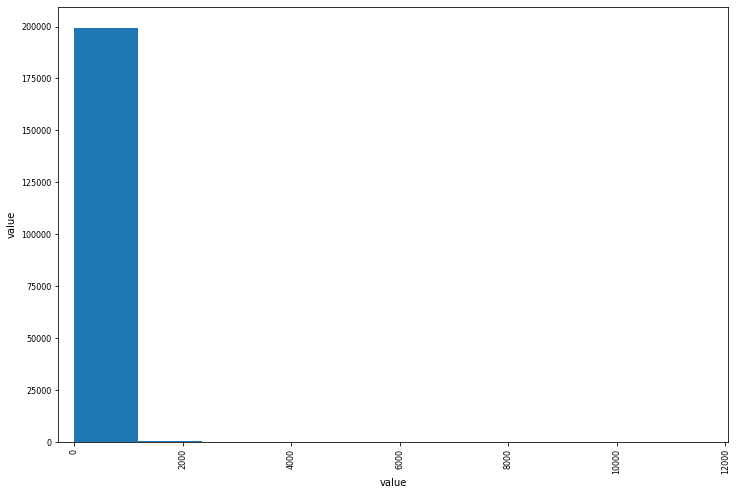

In [6]:
attributes = ['game-title', 'behavior-name', 'value']
scatter_matrix(df[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='game-title', ylabel='value'>

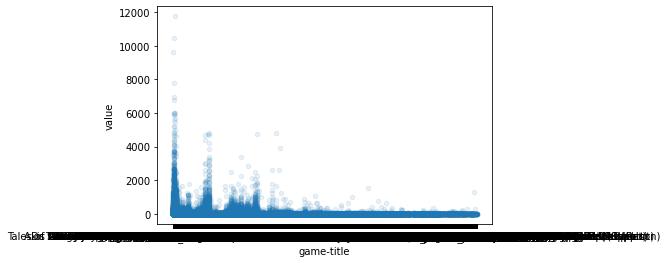

In [12]:
df.plot(kind="scatter", x="game-title", y="value", alpha=0.1)

In [8]:
df.describe()

,userid,value
count,2.000000e+05,200000.000000
mean,1.036559e+08,17.874384
std,7.208074e+07,138.056952
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


In [9]:
df.dropna(subset=['userid','game-title', 'behavior-name', 'value'])

,userid,game-title,behavior-name,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


In [10]:
By_game_user = df.groupby('game-title').agg({'userid':'count', 'value': 'sum'}).reset_index()
By_game_user = By_game_user.reset_index().sort_values(by=['userid'], ascending=False)
By_game_user

,index,game-title,userid,value
1336,1336,Dota 2,9682,986525.6
4257,4257,Team Fortress 2,4646,175996.3
981,981,Counter-Strike Global Offensive,2789,324183.6
4788,4788,Unturned,2632,17659.4
2475,2475,Left 4 Dead 2,1752,34547.7
...,...,...,...,...
4185,4185,Sword of the Stars The Pit Soundtrack,1,1.0
783,783,Cast of the Seven Godsends - Soundtrack,1,1.0
4198,4198,TERA Accessorize Pack,1,1.0
4199,4199,TERA Explorer's Pack,1,1.0


In [11]:
ordinal_encoder = OrdinalEncoder()
df_encoded = ordinal_encoder.fit_transform(df)
df_encoded[:10]

array([[5.494e+03, 4.364e+03, 1.000e+00, 9.000e+00],
       [5.494e+03, 4.364e+03, 0.000e+00, 4.520e+02],
       [5.494e+03, 1.678e+03, 1.000e+00, 9.000e+00],
       [5.494e+03, 1.678e+03, 0.000e+00, 2.660e+02],
       [5.494e+03, 3.997e+03, 1.000e+00, 9.000e+00],
       [5.494e+03, 3.997e+03, 0.000e+00, 1.480e+02],
       [5.494e+03, 1.679e+03, 1.000e+00, 9.000e+00],
       [5.494e+03, 1.679e+03, 0.000e+00, 1.200e+02],
       [5.494e+03, 2.475e+03, 1.000e+00, 9.000e+00],
       [5.494e+03, 2.475e+03, 0.000e+00, 8.800e+01]])

# User Analysis

In [13]:
df.head(3)

,userid,game-title,behavior-name,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0


In [14]:
#Ignore this part, somehow it doesn't work
#I imported the data into sql and have the data ready
q = """
select userid
, count(distinct game-title) as tt_gcnt
, count(distinct if(behavior-name = 'purchase', game-title, null)) as purchase_gcnt
, count(distinct if(behavior-name = 'play', game-title, null)) as play_gcnt
, sum(if(behavior-name = 'play', value, 0)) as play_total_hours
from df
group by userid
"""

In [15]:
print(ps.sqldf(q, locals()))

PandaSQLException: (sqlite3.OperationalError) no such column: game
[SQL: 
select userid
, count(distinct game-title) as tt_gcnt
, count(distinct if(behavior-name = 'purchase', game-title, null)) as purchase_gcnt
, count(distinct if(behavior-name = 'play', game-title, null)) as play_gcnt
, sum(if(behavior-name = 'play', value, 0)) as play_total_hours
from df
group by userid
]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [16]:
user_file = r"/Users/carolliu/Desktop/project_new/steamvideogames/user_output.csv"
user_df = pd.read_csv(user_file, header=None)
user_df.columns = ['userid','tt_gcnt','purchase_gcnt', 'play_gcnt', 'play_total_hours']
user_df.head(3)

,userid,tt_gcnt,purchase_gcnt,play_gcnt,play_total_hours
0,100012061,1,1,1,0
1,100053304,7,7,6,35
2,100057229,5,5,4,41


In [17]:
user_df.describe()

,userid,tt_gcnt,purchase_gcnt,play_gcnt,play_total_hours
count,1.239300e+04,12393.000000,12393.000000,12393.000000,12393.000000
mean,1.611377e+08,10.358832,10.311063,5.640604,275.139191
std,8.001490e+07,35.438883,35.204459,16.872044,754.471372
min,5.250000e+03,1.000000,0.000000,0.000000,0.000000
25%,9.706903e+07,1.000000,1.000000,1.000000,1.000000
50%,1.649396e+08,2.000000,2.000000,1.000000,13.000000
75%,2.209560e+08,6.000000,6.000000,3.000000,154.000000
max,3.099031e+08,1060.000000,1055.000000,489.000000,11754.000000


In [18]:
user_df['purchase_play_gap'] = user_df['purchase_gcnt']-user_df['play_gcnt']
user_df['avg_play_total_hours'] = user_df['play_total_hours']/user_df['play_gcnt']

<AxesSubplot:xlabel='purchase_gcnt', ylabel='play_gcnt'>

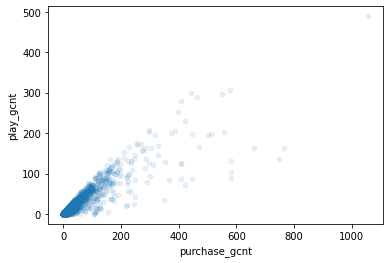

In [19]:
user_df.plot(kind="scatter", x="purchase_gcnt", y="play_gcnt", alpha=0.1)

<AxesSubplot:xlabel='purchase_gcnt', ylabel='avg_play_total_hours'>

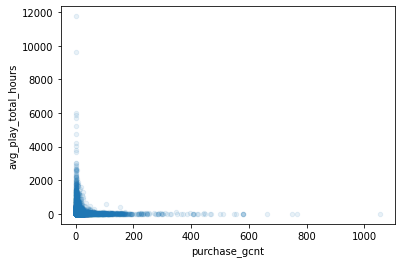

In [20]:
user_df.plot(kind="scatter", x="purchase_gcnt", y="avg_play_total_hours", alpha=0.1)

<AxesSubplot:xlabel='play_gcnt', ylabel='avg_play_total_hours'>

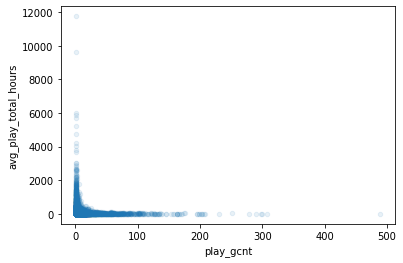

In [21]:
user_df.plot(kind="scatter", x="play_gcnt", y="avg_play_total_hours", alpha=0.1)

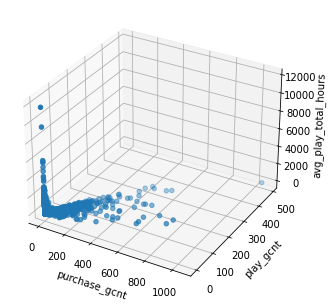

In [22]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(user_df['purchase_gcnt'], user_df['play_gcnt'], user_df['avg_play_total_hours'])
ax.set_xlabel('purchase_gcnt')
ax.set_ylabel('play_gcnt')
ax.set_zlabel('avg_play_total_hours')
plt.show()

# Modeling

In [24]:
user_df.head(5)

,userid,tt_gcnt,purchase_gcnt,play_gcnt,play_total_hours,purchase_play_gap,avg_play_total_hours
0,100012061,1,1,1,0,0,0.000000
1,100053304,7,7,6,35,1,5.833333
2,100057229,5,5,4,41,1,10.250000
3,100070732,7,7,4,283,3,70.750000
4,100096071,38,38,21,698,17,33.238095


In [25]:
df.head(5)

,userid,game-title,behavior-name,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
